<a href="https://colab.research.google.com/github/rafaelsaraviagrass/SIS420/blob/main/2doParcial_AprendizajeNoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 2. CARGA DE DATOS
# Cargar el dataset
file_path = "smoking.csv"
df = pd.read_csv(file_path)
df.head()



,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
# 3. PREPROCESAMIENTO
# Eliminar columnas que no aportan al clustering
cols_to_drop = ['ID']
df = df.drop(columns=cols_to_drop, errors='ignore')

# Codificar variables categóricas
cat_cols = ['gender', 'oral', 'tartar']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])




In [5]:
# Guardar la columna 'smoking' para análisis posterior
y = df['smoking']
df = df.drop(columns=['smoking'])



In [6]:
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)



In [7]:
# Aplicar PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [9]:
# Aplicar KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

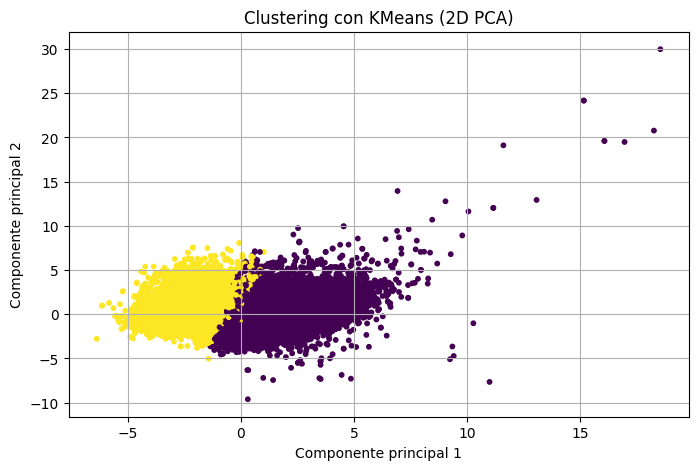

In [10]:
# Visualizar los resultados en 2D
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", s=10)
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("Clustering con KMeans (2D PCA)")
plt.grid(True)
plt.show()


In [11]:
# Calcular Silhouette Score
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.16
